In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv("data/billboard_2000_2018_spotify_lyrics.csv", encoding='iso-8859-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7573 entries, 0 to 7572
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              7573 non-null   object 
 1   year              7206 non-null   float64
 2   title             7573 non-null   object 
 3   simple_title      7206 non-null   object 
 4   artist            7573 non-null   object 
 5   main_artist       7206 non-null   object 
 6   peak_pos          7573 non-null   int64  
 7   last_pos          7573 non-null   int64  
 8   weeks             7573 non-null   int64  
 9   rank              7573 non-null   int64  
 10  change            7573 non-null   object 
 11  spotify_link      7368 non-null   object 
 12  spotify_id        7368 non-null   object 
 13  video_link        3513 non-null   object 
 14  genre             7573 non-null   object 
 15  broad_genre       7206 non-null   object 
 16  analysis_url      7573 non-null   object 


In [3]:
data.head()

,date,year,title,simple_title,artist,main_artist,peak_pos,last_pos,weeks,rank,...,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,lyrics
0,6/21/18,NaN,4th Dimension,NaN,Kanye West and Kid Cudi,NaN,42,0,1,42,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Error: Could not find lyrics.
1,6/21/18,NaN,All Girls Are The Same,NaN,Juice WRLD,NaN,41,49,5,41,...,0.0769,0.000335,4,0.671,0,165820,-7.226,0.203,1,"They're rotting my brain, love\nThese hoes are..."
2,6/21/18,NaN,All Mine,NaN,Kanye West,NaN,11,11,2,31,...,0.125,0,4,0.925,11,145507,-6.562,0.265,0,"Yeah, you supermodel thick\nDamn, that ass bus..."
3,6/21/18,NaN,Alone,NaN,Halsey Featuring Big Sean & Stefflon Don,NaN,70,73,9,74,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Error: Could not find lyrics.
4,6/21/18,NaN,Babe,NaN,Sugarland Featuring Taylor Swift,NaN,72,0,2,95,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Error: Could not find lyrics.


In [4]:
df = data[data['lyrics'] != 'Error: Could not find lyrics.'].copy()

In [5]:
df1 = df[df['broad_genre'] != 'unknown'].copy()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 1 to 7572
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              6991 non-null   object 
 1   year              6740 non-null   float64
 2   title             6991 non-null   object 
 3   simple_title      6740 non-null   object 
 4   artist            6991 non-null   object 
 5   main_artist       6740 non-null   object 
 6   peak_pos          6991 non-null   int64  
 7   last_pos          6991 non-null   int64  
 8   weeks             6991 non-null   int64  
 9   rank              6991 non-null   int64  
 10  change            6991 non-null   object 
 11  spotify_link      6914 non-null   object 
 12  spotify_id        6914 non-null   object 
 13  video_link        3398 non-null   object 
 14  genre             6991 non-null   object 
 15  broad_genre       6740 non-null   object 
 16  analysis_url      6991 non-null   object 


In [7]:
df1.columns

Index(['date', 'year', 'title', 'simple_title', 'artist', 'main_artist',
       'peak_pos', 'last_pos', 'weeks', 'rank', 'change', 'spotify_link',
       'spotify_id', 'video_link', 'genre', 'broad_genre', 'analysis_url',
       'energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'time_signature', 'danceability', 'key',
       'duration_ms', 'loudness', 'valence', 'mode', 'lyrics'],
      dtype='object')

In [8]:
columns = ['simple_title','year', 'main_artist','peak_pos', 'last_pos', 'spotify_link',
       'spotify_id', 'video_link', 'genre', 'analysis_url']

In [9]:
df2 = df1.drop(columns,axis=1).reset_index(drop=True).copy()

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              6991 non-null   object
 1   title             6991 non-null   object
 2   artist            6991 non-null   object
 3   weeks             6991 non-null   int64 
 4   rank              6991 non-null   int64 
 5   change            6991 non-null   object
 6   broad_genre       6740 non-null   object
 7   energy            6991 non-null   object
 8   liveness          6991 non-null   object
 9   tempo             6991 non-null   object
 10  speechiness       6991 non-null   object
 11  acousticness      6991 non-null   object
 12  instrumentalness  6991 non-null   object
 13  time_signature    6991 non-null   object
 14  danceability      6991 non-null   object
 15  key               6991 non-null   object
 16  duration_ms       6991 non-null   object
 17  loudness      

In [11]:
df3 = df2[df2['broad_genre'].notnull()].reset_index(drop=True).copy()
df4 = df3[df3['lyrics'].notnull()].reset_index(drop=True).copy()

In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              6575 non-null   object
 1   title             6575 non-null   object
 2   artist            6575 non-null   object
 3   weeks             6575 non-null   int64 
 4   rank              6575 non-null   int64 
 5   change            6575 non-null   object
 6   broad_genre       6575 non-null   object
 7   energy            6575 non-null   object
 8   liveness          6575 non-null   object
 9   tempo             6575 non-null   object
 10  speechiness       6575 non-null   object
 11  acousticness      6575 non-null   object
 12  instrumentalness  6575 non-null   object
 13  time_signature    6575 non-null   object
 14  danceability      6575 non-null   object
 15  key               6575 non-null   object
 16  duration_ms       6575 non-null   object
 17  loudness      

In [14]:
y = df4.groupby('broad_genre')['date'].count()
x = ['country','edm','pop','r&b','rap','rock']

Text(0.5, 1.0, 'Numbers of Songs')

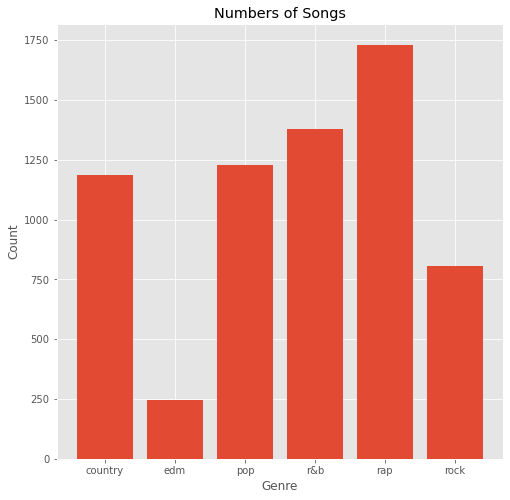

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x,y)
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('Numbers of Songs')

In [18]:
rank1 = df4[df4['rank'] == 1].reset_index(drop=True).copy()
rank1

,date,title,artist,weeks,rank,change,broad_genre,energy,liveness,tempo,...,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,lyrics
0,12/31/17,Perfect,ed sheeran,18,1,0,pop,0.299,0.123,94.992,...,0.779,0,3,0.587,8,259550,-7.365,0.356,1,"I found a love for me\nOh darling, just dive r..."
1,12/21/17,Perfect,ed sheeran,15,1,2,pop,0.299,0.123,94.992,...,0.779,0,3,0.587,8,259550,-7.365,0.356,1,"I found a love for me\nOh darling, just dive r..."
2,5/26/12,Somebody That I Used To Know,gotye,59,1,0,rock,0.517,0.102,129.063,...,0.565,0.000195,4,0.857,0,244973,-6.972,0.754,1,Now and then I think of when we were together\...
3,4/30/11,S&M,rihanna,14,1,1,r&b,0.675,0.196,127.969,...,0.0131,8.93E-05,4,0.765,1,243533,-4.999,0.802,1,"Na na na, come on\nNa na na, come on\nNa na na..."
4,12/12/09,Empire State Of Mind,jay-z + alicia keys,30,1,0,rap,0.933,0.503,173.414,...,0.0294,0,4,0.495,11,277400,-3.977,0.815,1,Yeah\nYeah I'm out that Brooklyn.\nNow I'm dow...
5,3/7/09,Right Round,flo rida,4,1,0,edm,0.672,0.232,124.986,...,0.009,0,4,0.72,7,204640,-6.852,0.705,1,"You spin my head right round, right round\n\nW..."
6,9/22/07,Crank That (Soulja Boy),soulja boy,9,1,0,rap,0.722,0.074,140.139,...,0.515,0,4,0.74,0,222653,-2.149,0.841,1,- (You!) Soulja boy I tell 'em Hey I got a new...
7,6/2/07,Makes Me Wonder,maroon 5,7,1,1,pop,0.861,0.0627,113.997,...,0.00485,0.000245,4,0.812,7,211080,-2.415,0.885,1,I wake up with blood-shot eyes\nStruggled to m...


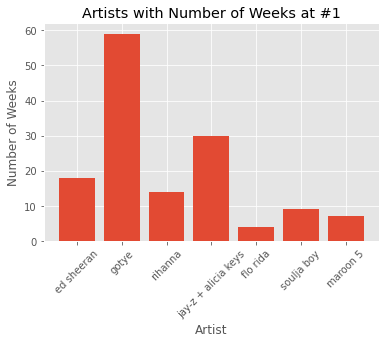

In [21]:
fig , ax = plt.subplots()
ax.bar(rank1['artist'],rank1['weeks'])
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Number of Weeks')
plt.title('Artists with Number of Weeks at #1')
plt.show()

In [22]:
len(df4['title'].unique())

5760

In [23]:
df5 = df4.drop_duplicates(subset=['title']).reset_index(drop=True).copy()

In [24]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              5760 non-null   object
 1   title             5760 non-null   object
 2   artist            5760 non-null   object
 3   weeks             5760 non-null   int64 
 4   rank              5760 non-null   int64 
 5   change            5760 non-null   object
 6   broad_genre       5760 non-null   object
 7   energy            5760 non-null   object
 8   liveness          5760 non-null   object
 9   tempo             5760 non-null   object
 10  speechiness       5760 non-null   object
 11  acousticness      5760 non-null   object
 12  instrumentalness  5760 non-null   object
 13  time_signature    5760 non-null   object
 14  danceability      5760 non-null   object
 15  key               5760 non-null   object
 16  duration_ms       5760 non-null   object
 17  loudness      

In [25]:
df5[df5['liveness']=='unknown']

,date,title,artist,weeks,rank,change,broad_genre,energy,liveness,tempo,...,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,lyrics
151,11/18/17,Too Hotty,"quavo, takeoff",4,96,3,rap,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,"Whoop, yeah\n\nFather God, Father God\nI just ..."
278,7/29/17,Bam,jay-z,1,47,New,rap,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Now greetings to the world\nGangsta no live in...
279,7/29/17,Family Feud,jay-z,1,51,New,rap,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,"My nigga got on\nMy nigga got on all white, no..."
281,7/29/17,Smile,jay-z,1,56,New,rap,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,"Good morn' or evening, friends\nSmile, you rec..."
282,7/29/17,Caught Their Eyes,jay-z,1,63,New,rap,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Ready for it\nI'm ready for it\nYeah\nAh\n\nEa...
283,7/29/17,Moonlight,jay-z,1,86,New,rap,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,"Yeah, got Lil Cos up here with me\nYeah, yeah\..."
284,7/29/17,Marcy Me,jay-z,1,90,New,rap,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Live from Bedford-Stuyvesant\nThe livest one r...
456,3/4/17,Wanna Be That Song,brett eldredge,20,90,-2,country,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,The radio and a sundress\nMakin' my world all ...
838,3/26/16,Untitled 07 l 2014 - 2016,kendrick lamar,1,90,New,rap,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Pimp pimp! (hooray!)\nPimp pimp! (hooray!)\n(H...
1156,4/25/15,11-Jul,beyonce,20,51,-2,r&b,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,[P. Diddy - talking]\nYeah\nThere's three thin...


In [26]:
#After Checking Spotify documentation I filled with meaningful numbers.
# Documentation : https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

df5 = df5.replace({'valence' : 'unknown'},0.5)
df5 = df5.replace({'instrumentalness' : 'unknown','mode':'unknown'}, 0)
df5 = df5.replace({'key' : 'unknown'}, 5 )
df5 = df5.replace({'tempo' : 'unknown'}, 110 )
df5 = df5.replace({'acousticness' : 'unknown'}, 0.10)
df5 = df5.replace({'danceability' : 'unknown'}, 0.62)
df5 = df5.replace({'energy' : 'unknown'}, 0.69)
df5 = df5.replace({'liveness' : 'unknown'}, 0.15)
df5 = df5.replace({'speechiness' : 'unknown'}, 0.1)

In [27]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              5760 non-null   object
 1   title             5760 non-null   object
 2   artist            5760 non-null   object
 3   weeks             5760 non-null   int64 
 4   rank              5760 non-null   int64 
 5   change            5760 non-null   object
 6   broad_genre       5760 non-null   object
 7   energy            5760 non-null   object
 8   liveness          5760 non-null   object
 9   tempo             5760 non-null   object
 10  speechiness       5760 non-null   object
 11  acousticness      5760 non-null   object
 12  instrumentalness  5760 non-null   object
 13  time_signature    5760 non-null   object
 14  danceability      5760 non-null   object
 15  key               5760 non-null   object
 16  duration_ms       5760 non-null   object
 17  loudness      

In [28]:
## Changed the data types 

df5['energy'] = df5['energy'].astype(float)
df5['liveness'] = df5['liveness'].astype(float)
df5['tempo'] = df5['tempo'].astype(float)
df5['speechiness'] = df5['speechiness'].astype(float)
df5['acousticness'] = df5['acousticness'].astype(float)
df5['instrumentalness'] = df5['instrumentalness'].astype(float)
df5['mode'] = df5['mode'].astype(float)
df5['danceability'] = df5['danceability'].astype(float)
df5['valence'] = df5['valence'].astype(float)
df5['key'] = df5['key'].astype(float)

In [29]:
corr_metrics = df5.corr()
corr_metrics.style.background_gradient()

,weeks,rank,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,valence,mode
weeks,1.000000,-0.525805,0.012106,-0.052567,-0.025481,-0.071153,-0.047495,-0.045740,0.089128,0.000568,0.099738,0.034540
rank,-0.525805,1.000000,0.064070,0.036359,0.018359,0.017227,-0.010306,-0.005622,-0.072685,-0.012508,-0.025058,0.013899
energy,0.012106,0.064070,1.000000,0.157767,0.128842,0.009512,-0.532982,-0.097637,-0.041644,0.018390,0.414995,-0.038026
liveness,-0.052567,0.036359,0.157767,1.000000,0.029590,0.105681,-0.076477,-0.025650,-0.068411,0.004076,0.026401,-0.008479
tempo,-0.025481,0.018359,0.128842,0.029590,1.000000,0.026488,-0.080155,0.018210,-0.221171,-0.019396,-0.005607,0.048699
speechiness,-0.071153,0.017227,0.009512,0.105681,0.026488,1.000000,-0.035462,-0.046734,0.227708,0.012576,0.088947,-0.148703
acousticness,-0.047495,-0.010306,-0.532982,-0.076477,-0.080155,-0.035462,1.000000,0.048832,-0.123853,-0.007357,-0.179207,0.049304
instrumentalness,-0.045740,-0.005622,-0.097637,-0.025650,0.018210,-0.046734,0.048832,1.000000,-0.043528,0.006715,-0.068408,-0.024321
danceability,0.089128,-0.072685,-0.041644,-0.068411,-0.221171,0.227708,-0.123853,-0.043528,1.000000,-0.010365,0.379525,-0.138273
key,0.000568,-0.012508,0.018390,0.004076,-0.019396,0.012576,-0.007357,0.006715,-0.010365,1.000000,0.016585,-0.125411


In [30]:
## save the clean dataset
df5.to_csv('Billboard_cleaned.csv', index = False)